In [3]:
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
df2020 =  pd.read_csv ("acidentes_2020.csv",sep=';',parse_dates=['data'],dayfirst = True)
df2019 = pd.read_csv ("acidentes-2019.csv",sep=';',parse_dates=['DATA'],dayfirst = True)
df2018 = pd.read_csv ("acidentes_2018.csv",sep=';',parse_dates=['DATA'],dayfirst = True)
df2017 = pd.read_csv ("acidentes_2017.csv",sep=';',parse_dates=['data'],dayfirst = True)
df2016 = pd.read_csv ("acidentes_2016.csv",sep=';',parse_dates=['data'],dayfirst = True)
df2015 = pd.read_csv ("acidentes_2015.csv",sep=';',parse_dates=['data'],dayfirst = True)

In [5]:
df2018.rename(columns={'DATA':'data'},inplace=True)
df2019.rename(columns={'DATA':'data'},inplace=True)

In [6]:
df = pd.concat([df2015, df2016,df2017,df2018,df2019,df2020], ignore_index=True, sort=False)

In [7]:
df.dtypes

tipo                                 object
situacao                             object
data                         datetime64[ns]
hora                                 object
bairro                               object
endereco                             object
numero                               object
complemento                          object
natureza                             object
descricao                            object
auto                                float64
moto                                float64
ciclom                              float64
ciclista                            float64
pedestre                            float64
onibus                              float64
caminhao                            float64
viatura                             float64
outros                              float64
vitimas                             float64
natureza_acidente                    object
detalhe_endereco_acidente            object
endereco_cruzamento             

In [8]:
df = df[['data','hora','bairro','endereco','descricao','vitimas','pedestre','ciclista','ciclom','moto','auto','caminhao','onibus','outros','viatura' ]]

In [9]:
df.dtypes

data         datetime64[ns]
hora                 object
bairro               object
endereco             object
descricao            object
vitimas             float64
pedestre            float64
ciclista            float64
ciclom              float64
moto                float64
auto                float64
caminhao            float64
onibus              float64
outros              float64
viatura             float64
dtype: object

In [10]:
df.ciclista.describe()

count    843.000000
mean       1.015421
std        0.178405
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: ciclista, dtype: float64

In [11]:
filtro = (df['ciclista'] == 5)
df.ciclista.loc[filtro] = pd.NA

In [12]:
df.ciclista.loc[df['ciclista']==0] = pd.NA

/home/vitor/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
df.ciclista.value_counts()

1.0    831
2.0     10
Name: ciclista, dtype: int64

In [14]:
filtro = (df['ciclista'] > 0) & (df['auto'] > 0)
acidentes_carro_x_bike = df.loc[filtro].ciclista.count()

In [15]:
filtro = (df['ciclista'] > 0) 
total_acidentes = df.loc[filtro].ciclista.count()

In [16]:
filtro = (df['ciclista'] > 0) & (df['onibus'] > 0)
acidentes_onibus_x_bike = df.groupby(['ciclista','onibus']).size().sum()


In [17]:
filtro = (df['ciclista'] > 0) & (df['caminhao'] > 0)
acidentes_caminhao_x_bike = df.groupby(['ciclista','caminhao']).size().sum()


In [18]:
filtro = (df['ciclista'] > 0) & (df['pedestre'] > 0)
acidentes_pedestre_x_bike = df.groupby(['ciclista','pedestre']).size().sum()


<h3> Numeros de acidentes com ciclistas por tipo de veículo </h3> 

In [19]:
print('Total de acidentes :{}, acidentes por tipo de veículo: carro: {} ,caminhao: {}, onibus: {}, pedestre: {}. '.format(total_acidentes,acidentes_carro_x_bike,acidentes_onibus_x_bike,acidentes_caminhao_x_bike,acidentes_pedestre_x_bike))

Total de acidentes :841, acidentes por tipo de veículo: carro: 484 ,caminhao: 137, onibus: 28, pedestre: 13. 


In [63]:
df1=pd.DataFrame({"veiculo": ['carro','caminhao','onibus','pedestre'],"acidentes": [484,137,28,13]})

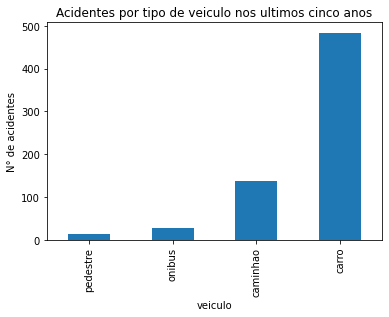

In [70]:
df1.groupby(df1['veiculo']).acidentes.sum().sort_values(ascending=True).plot.bar(title='Acidentes por tipo de veiculo nos ultimos cinco anos');
plt.ylabel("N° de acidentes");
plt.savefig('Acidentes com ciclistas em Recife por tipo de veiculo.png')

 <h3>Numeros de acidentes com ciclistas por ano </h3>

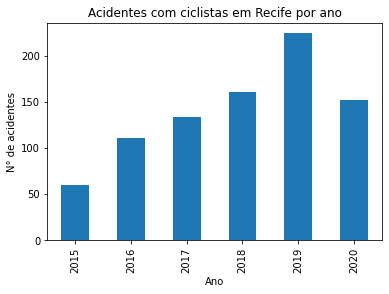

In [35]:
df.groupby(df['data'].dt.year).ciclista.count().plot.bar(title='Acidentes com ciclistas em Recife por ano');
plt.ylabel("N° de acidentes");
plt.xlabel("Ano");
plt.savefig('Acidentes com ciclistas em Recife por ano.png')

<h3>Numeros de acidentes com ciclistas por endereco</h3>

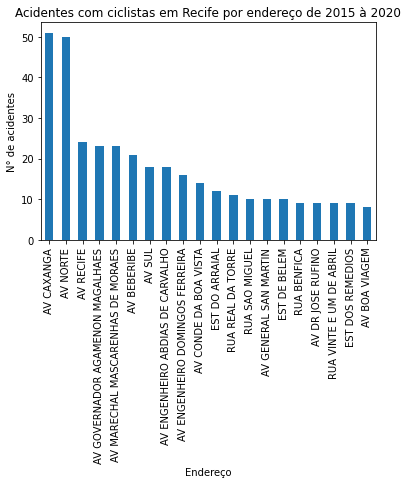

In [20]:
df.groupby(['endereco']).ciclista.count().sort_values(ascending=False).head(20).plot.bar(title='Acidentes com ciclistas em Recife por endereço de 2015 à 2020');
plt.ylabel("N° de acidentes");
plt.xlabel("Endereço");
plt.savefig('Acidentes com ciclistas em Recife por endereço de 2015 à 2020.png')

<h3> Percentual de acidentes </h3>

In [344]:
dfpareto=df.groupby(['endereco','ciclista']).ciclista.count().sort_values(ascending=False).head(100).to_frame(name='acidentes').reset_index()



In [345]:
dfpareto['%']=dfpareto['acidentes']/dfpareto['acidentes'].sum() * 100

In [346]:
dfpareto['acumulado']=dfpareto['%'].cumsum()

In [347]:
filtro=dfpareto['acumulado']==70.0
dfpareto.loc[filtro]
#dfpareto.iloc[87]

,endereco,ciclista,acidentes,%,acumulado


In [334]:
dfpareto.iloc[:10]


,endereco,ciclista,acidentes,%,acumulado
0,AV CAXANGA,1.0,50,5.952381,5.952381
1,AV NORTE,1.0,48,5.714286,11.666667
2,AV RECIFE,1.0,24,2.857143,14.523810
3,AV MARECHAL MASCARENHAS DE MORAES,1.0,23,2.738095,17.261905
4,AV GOVERNADOR AGAMENON MAGALHAES,1.0,22,2.619048,19.880952
5,AV BEBERIBE,1.0,21,2.500000,22.380952
6,AV ENGENHEIRO ABDIAS DE CARVALHO,1.0,18,2.142857,24.523810
7,AV SUL,1.0,17,2.023810,26.547619
8,AV ENGENHEIRO DOMINGOS FERREIRA,1.0,16,1.904762,28.452381
9,AV CONDE DA BOA VISTA,1.0,14,1.666667,30.119048
